<a href="https://colab.research.google.com/github/rdhtdata/test_1/blob/main/Fraud_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder

In [19]:
file_name="Fraud.csv"
df = pd.read_csv(file_name)

In [20]:
df.shape

(6362620, 11)

In [21]:
df.head(200)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.00,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.00,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.00,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.00,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.00,0.00,0,0
...,...,...,...,...,...,...,...,...,...,...,...
195,1,CASH_OUT,210370.09,C2121995675,0.0,0.00,C1170794006,1442298.03,22190.99,0,0
196,1,CASH_OUT,36437.06,C2120063568,0.0,0.00,C1740000325,154606.00,1363368.51,0,0
197,1,CASH_OUT,82691.56,C1620409359,0.0,0.00,C248609774,657983.89,6453430.91,0,0
198,1,CASH_OUT,338767.10,C691691381,0.0,0.00,C453211571,544481.28,3461666.05,0,0


In [22]:
df.tail()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.0,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.0,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.0,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.0,C2080388513,0.00,0.00,1,0
6362619,743,CASH_OUT,850002.52,C1280323807,850002.52,0.0,C873221189,6510099.11,7360101.63,1,0


In [23]:
# Check for null values
df.isnull().values.any()

False

In [24]:
# Getting information about data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [25]:
legit = len(df[df.isFraud == 0])
fraud = len(df[df.isFraud == 1])
legit_percent = (legit / (fraud + legit)) * 100
fraud_percent = (fraud / (fraud + legit)) * 100

print("Number of Legit transactions: ", legit)
print("Number of Fraud transactions: ", fraud)
print("Percentage of Legit transactions: {:.4f} %".format(legit_percent))
print("Percentage of Fraud transactions: {:.4f} %".format(fraud_percent))

Number of Legit transactions:  6354407
Number of Fraud transactions:  8213
Percentage of Legit transactions: 99.8709 %
Percentage of Fraud transactions: 0.1291 %


highly unbalanced data as Percentage of Legit transactions= 99.87 % and Percentage of Fraud transactions= 0.13 %. Decision trees are good for data with high percentage imbalance.

In [26]:
# Merchants
X = df[df['nameDest'].str.contains('M')]
X.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0
5,1,PAYMENT,7817.71,C90045638,53860.0,46042.29,M573487274,0.0,0.0,0,0
6,1,PAYMENT,7107.77,C154988899,183195.0,176087.23,M408069119,0.0,0.0,0,0


Visualizations

<Axes: >

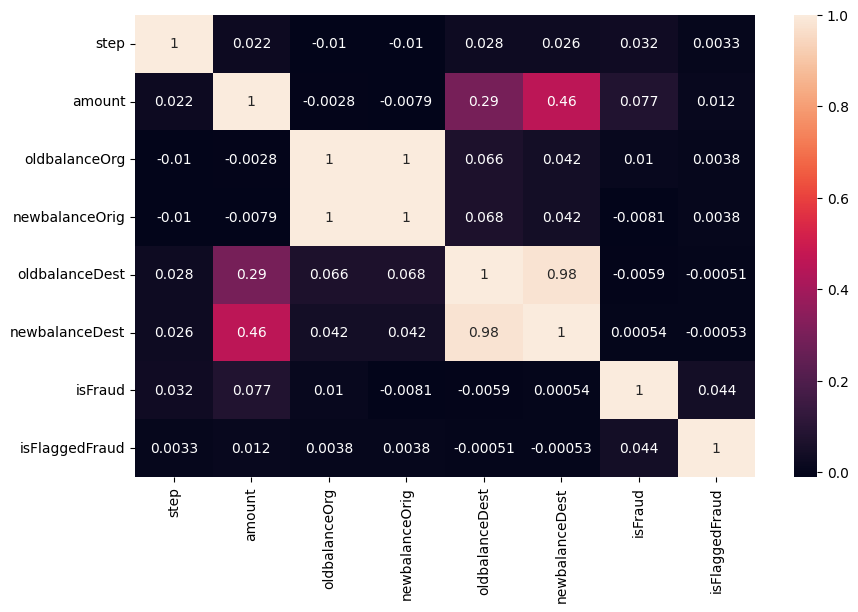

In [27]:
corr=df.corr(numeric_only=True)

plt.figure(figsize=(10,6))
sns.heatmap(corr,annot=True)

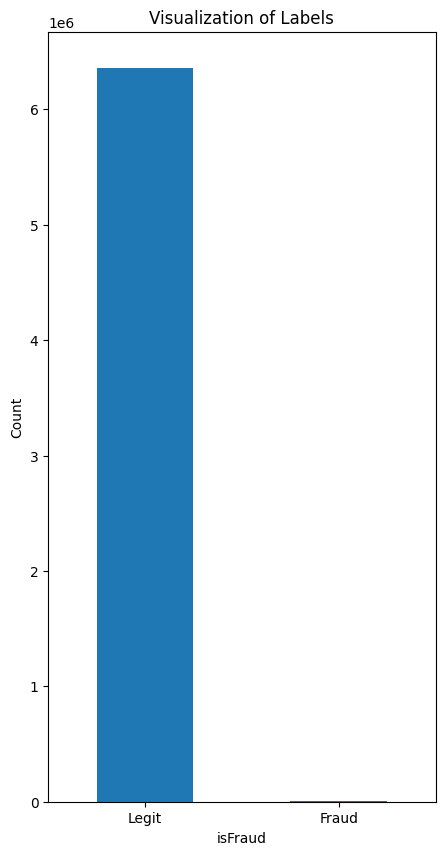

In [28]:
plt.figure(figsize=(5,10))
labels = ["Legit", "Fraud"]
count_classes = df.value_counts(df['isFraud'], sort= True)
count_classes.plot(kind = "bar", rot = 0)
plt.title("Visualization of Labels")
plt.ylabel("Count")
plt.xticks(range(2), labels)
plt.show()

attempt to solve the problem

In [29]:
#creating a copy of original dataset to train and test models

new_df=df.copy()
new_df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [30]:
# Checking how many attributes are dtype: object

objList = new_df.select_dtypes(include = "object").columns
print (objList)

Index(['type', 'nameOrig', 'nameDest'], dtype='object')


Since there are 3 atrributes with object type we need to use label encoding to work with them and establish multi-colinearity

In [31]:
#Label Encoding for object to numeric conversion
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

for feat in objList:
    new_df[feat] = le.fit_transform(new_df[feat].astype(str))

print (new_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            int64  
 2   amount          float64
 3   nameOrig        int64  
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        int64  
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(6)
memory usage: 534.0 MB
None


In [33]:
new_df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,3,9839.64,757869,170136.0,160296.36,1662094,0.0,0.0,0,0
1,1,3,1864.28,2188998,21249.0,19384.72,1733924,0.0,0.0,0,0
2,1,4,181.00,1002156,181.0,0.00,439685,0.0,0.0,1,0
3,1,1,181.00,5828262,181.0,0.00,391696,21182.0,0.0,1,0
4,1,3,11668.14,3445981,41554.0,29885.86,828919,0.0,0.0,0,0


checking for Multi-colinearity, which can be established using Variance Inflation Factor

In [34]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif(df):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = df.columns
    vif["VIF"] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]

    return(vif)

calc_vif(new_df)

,variables,VIF
0,step,2.791610
1,type,4.467405
2,amount,4.149312
3,nameOrig,2.764234
4,oldbalanceOrg,576.803777
5,newbalanceOrig,582.709128
6,nameDest,3.300975
7,oldbalanceDest,73.349937
8,newbalanceDest,85.005614
9,isFraud,1.195305


using the VIF values, and assuming our cut-off to be < 5, thus we have to handle the folowing artributes : oldbalanceOrg, newbalanceOrg, old balanceDest, NewbalanceDest

In [35]:
new_df['Actual_amount_orig'] = new_df.apply(lambda x: x['oldbalanceOrg'] - x['newbalanceOrig'],axis=1)
new_df['Actual_amount_dest'] = new_df.apply(lambda x: x['oldbalanceDest'] - x['newbalanceDest'],axis=1)

In [36]:
new_df = new_df.drop(['oldbalanceOrg','newbalanceOrig','oldbalanceDest','newbalanceDest'],axis=1)

calc_vif(new_df)

,variables,VIF
0,step,2.716281
1,type,4.311403
2,amount,3.972755
3,nameOrig,2.686866
4,nameDest,3.261088
5,isFraud,1.190013
6,isFlaggedFraud,1.002563
7,Actual_amount_orig,1.339171
8,Actual_amount_dest,3.790322


<Axes: >

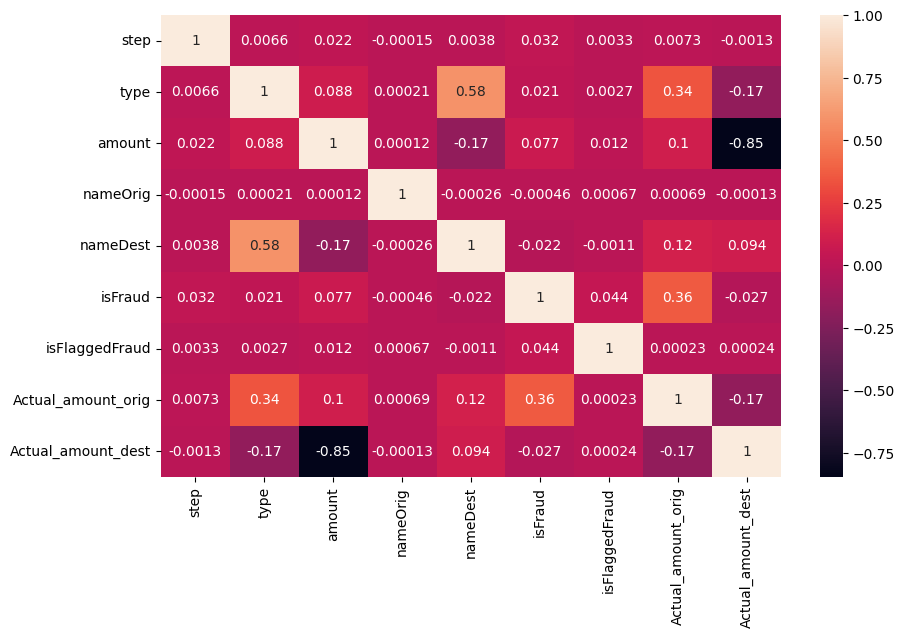

In [37]:
corr=new_df.corr()

plt.figure(figsize=(10,6))
sns.heatmap(corr,annot=True)

Model building

In [38]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
import itertools
from collections import Counter
import sklearn.metrics as metrics
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

Normalizing amount column :

In [39]:
# Perform Scaling
scaler = StandardScaler()
new_df["NormalizedAmount"] = scaler.fit_transform(new_df["amount"].values.reshape(-1, 1))
new_df.drop(["amount"], inplace= True, axis= 1)

Y = new_df["isFraud"]
X = new_df.drop(["isFraud"], axis= 1)

Preparing training and test data :

In [40]:
# Split the data
(X_train, X_test, Y_train, Y_test) = train_test_split(X, Y, test_size= 0.3, random_state= 36)

print("Shape of X_train: ", X_train.shape)
print("Shape of X_test: ", X_test.shape)

Shape of X_train:  (4453834, 8)
Shape of X_test:  (1908786, 8)


Model Training

In [41]:
# DECISION TREE

decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, Y_train)

Y_pred_dt = decision_tree.predict(X_test)
decision_tree_score = decision_tree.score(X_test, Y_test) * 100

In [49]:
# RANDOM FOREST

random_forest = RandomForestClassifier(n_estimators= 100)
random_forest.fit(X_train, Y_train)

Y_pred_rf = random_forest.predict(X_test)
random_forest_score = random_forest.score(X_test, Y_test) * 100

In [50]:
# Print scores of our classifiers

print("Decision Tree Score: ", decision_tree_score)
print("Random Forest Score: ", random_forest_score)

Decision Tree Score:  99.9408524580545
Random Forest Score:  99.96306552960887


In [51]:
# key terms of Confusion Matrix - DT

print("TP,FP,TN,FN - Decision Tree")
tn, fp, fn, tp = confusion_matrix(Y_test, Y_pred_dt).ravel()
print(f'True Positives: {tp}')
print(f'False Positives: {fp}')
print(f'True Negatives: {tn}')
print(f'False Negatives: {fn}')

print("----------------------------------------------------------------------------------------")

# key terms of Confusion Matrix - RF

print("TP,FP,TN,FN - Random Forest")
tn, fp, fn, tp = confusion_matrix(Y_test, Y_pred_rf).ravel()
print(f'True Positives: {tp}')
print(f'False Positives: {fp}')
print(f'True Negatives: {tn}')
print(f'False Negatives: {fn}')

TP,FP,TN,FN - Decision Tree
True Positives: 1858
False Positives: 571
True Negatives: 1905799
False Negatives: 558
----------------------------------------------------------------------------------------
TP,FP,TN,FN - Random Forest
True Positives: 1763
False Positives: 52
True Negatives: 1906318
False Negatives: 653


TP(DT) > TP(RF)

FP(DT) >> FP(RF)

TN(DT) ~ TN(RF)

FN(DT) < FN(RF)

in order for us to get the best results we need to minimize false negatives and maximize true positives.

In [52]:
# confusion matrix - DT

confusion_matrix_dt = confusion_matrix(Y_test, Y_pred_dt.round())
print("Confusion Matrix - Decision Tree")
print(confusion_matrix_dt,)

print("----------------------------------------------------------------------------------------")

# confusion matrix - RF

confusion_matrix_rf = confusion_matrix(Y_test, Y_pred_rf.round())
print("Confusion Matrix - Random Forest")
print(confusion_matrix_rf)

Confusion Matrix - Decision Tree
[[1905799     571]
 [    558    1858]]
----------------------------------------------------------------------------------------
Confusion Matrix - Random Forest
[[1906318      52]
 [    653    1763]]


In [53]:
# classification report - DT

classification_report_dt = classification_report(Y_test, Y_pred_dt)
print("Classification Report - Decision Tree")
print(classification_report_dt)

print("----------------------------------------------------------------------------------------")

# classification report - RF

classification_report_rf = classification_report(Y_test, Y_pred_rf)
print("Classification Report - Random Forest")
print(classification_report_rf)

Classification Report - Decision Tree
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1906370
           1       0.76      0.77      0.77      2416

    accuracy                           1.00   1908786
   macro avg       0.88      0.88      0.88   1908786
weighted avg       1.00      1.00      1.00   1908786

----------------------------------------------------------------------------------------
Classification Report - Random Forest
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1906370
           1       0.97      0.73      0.83      2416

    accuracy                           1.00   1908786
   macro avg       0.99      0.86      0.92   1908786
weighted avg       1.00      1.00      1.00   1908786



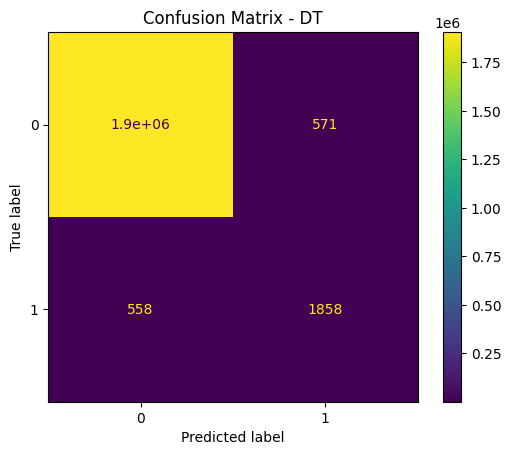

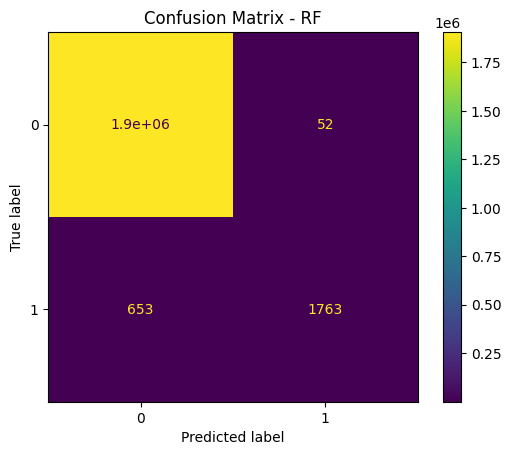

In [54]:
# visualising confusion matrix - DT


disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix_dt)
disp.plot()
plt.title('Confusion Matrix - DT')
plt.show()

# visualising confusion matrix - RF
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix_rf)
disp.plot()
plt.title('Confusion Matrix - RF')
plt.show()

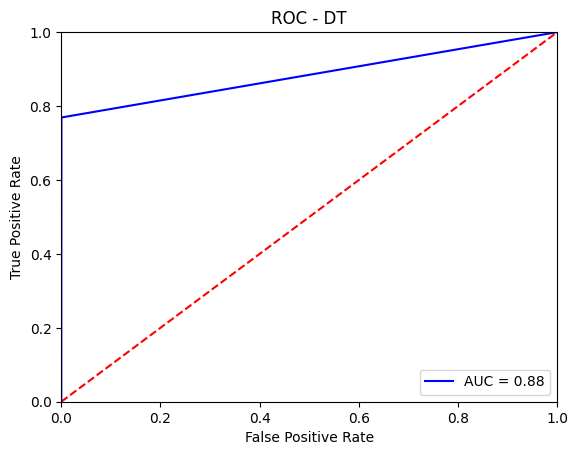

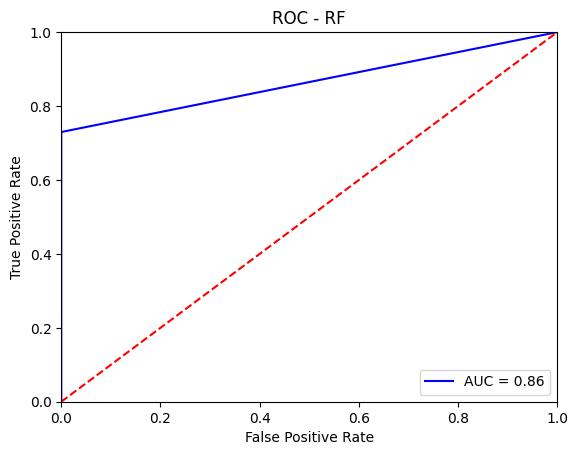

In [55]:
# AUC ROC - DT
# calculate the fpr and tpr for all thresholds of the classification

fpr, tpr, threshold = metrics.roc_curve(Y_test, Y_pred_dt)
roc_auc = metrics.auc(fpr, tpr)

plt.title('ROC - DT')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# AUC ROC - RF
# calculate the fpr and tpr for all thresholds of the classification

fpr, tpr, threshold = metrics.roc_curve(Y_test, Y_pred_rf)
roc_auc = metrics.auc(fpr, tpr)

plt.title('ROC - RF')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

using the formulas:
decision tree : DT
random forest : RF

accuracy : (TP+TN)/(TP+TN+FP+FN), how often the model is correct overall

DT accuracy : 99.94%
RF accuracy : 99.96%

Precision : TP/(TP+FP), measure of how many postive predictions were correct

DT precision : 76.5%,
RF precision : 97.1%


Recall : TP/(TP+FN),
measure of how well the model identifies actual positives

DT recall : 76.9%,
RF recall : 72.9%



F1 Score : 2*((Precision*Recall)/(precision+Recall)),
harmonic mean of Precision and Recall, using in this case as the data set is imbalanced

DT : 0.767,
RF : 0.833

**THE AUC for both Decision Tree and Random Forest is equal, so both models are pretty good at what they do.

Conclusion
Random Forest has a much higher precision and a slightly better F1 score, meaning it produces fewer false positives and performs better overall.
Decision Tree has a slightly better recall, so it's better at identifying fraud cases, but at the cost of higher false positives.
Given these metrics, Random Forest would likely give better overall results, especially if minimizing false positives is critical (which is often important in fraud detection).


Also the reason I have chosen this model is because of highly unbalanced dataset (Legit: Fraud :: 99.87:0.13). Random forest makes multiple decision trees which makes it easier (although time taking) for model to understand the data in a simpler way since Decision Tree makes decisions in a boolean way.


Models like XGBoost, Bagging, ANN, and Logistic Regression may give good accuracy but they won't give good precision and recall values. **



in order to prevent future fraud detection the company can adopt the following methods :
a. Data Integrity and Backup

Ensure that data used for fraud detection (such as transaction histories, user data, and patterns) is backed up securely. A failure in data migration or loss during updates could negatively impact the fraud detection system.

b. Testing and Staging Environment

Perform updates in a staging environment before implementing them in production. This helps to test how infrastructure changes affect the fraud detection models and ensure that no performance issues arise.

c. Model Versioning and Monitoring

When updating infrastructure, ensure that model versioning is in place so you can roll back to previous models in case of performance degradation. Additionally, enable real-time monitoring of model performance (precision, recall, etc.) during and after the updates.

d. Security Enhancements

Given the sensitive nature of fraud detection, strengthen security measures during infrastructure updates, including secure API access, database encryption, and updating firewalls. Implementing multi-factor authentication (MFA) and following least-privilege access control for systems handling fraud data is crucial.

e. Minimize Downtime

Fraud detection needs to be active at all times to minimize fraud losses. Plan for minimal downtime or adopt zero-downtime deployment strategies, such as using load balancers or failover mechanisms.

f. Anomaly Detection for System Updates

Implement automated systems to monitor for anomalies in the infrastructure during the update. If anything unusual is detected, such as abnormal spikes in false positives/negatives or latency, a rollback mechanism should be in place.

g. Data Privacy Compliance

Ensure that the updated infrastructure remains compliant with data privacy regulations (e.g., GDPR, CCPA), especially when dealing with sensitive customer data. Any changes should be documented for audits and compliance reporting.



To determine if the abve methods are working:


A. System Monitoring and Logging

Set up continuous monitoring of key system components (e.g., data pipelines, transaction speeds, detection latency). Tools like Grafana or Prometheus can provide dashboards for infrastructure health metrics. If there are no significant anomalies or spikes in resource usage or latency, the update has likely been successful.

B. User Feedback and Incident Reporting

Gather feedback from the fraud detection team and stakeholders. If they report a reduction in fraud incidents, faster detections, or fewer false positives post-update, it indicates the actions are working. Additionally, look for fewer fraud-related customer complaints.

C. A/B Testing or Shadow Deployment

For evaluating the impact of infrastructure changes, use A/B testing or shadow deployment strategies. Run the updated system in parallel with the old one on a subset of data. Compare results to see if there are any differences in detection accuracy, latency, or resource usage.

D. Security Audits

Conduct internal and external security audits to verify if the implemented security enhancements (e.g., encryption, access control) have successfully hardened the system against breaches or data leaks during the updates.

E. Anomaly Detection

Monitor for anomalies in fraud detection performance or transaction patterns after the update. If no unusual patterns arise (e.g., sudden spikes in fraud or model failure), it’s a sign that the infrastructure updates are not causing negative side effects.

F. Downtime and Failure Recovery Metrics

Check the downtime statistics. If the system continues operating with minimal or no downtime, and rollback procedures are functioning properly, it indicates successful deployment.